In [2]:
import traj_reader as trj
import numpy as np
import matplotlib.pyplot as plt
import CNC_class as cnc
import cnc_analysis_utils
import seaborn as sns
import pandas as pd


file_dir = './simulation_traj_topol/'
gro_file = file_dir+'solute.gro'
Data = trj.gro_reader(gro_file)
CNC_group = cnc.CNC_analys(Data)
domain = 'interior'


phi_file = 'phi_psi/Phis_dist.xvg'
psi_file = 'phi_psi/Psis_dist.xvg'
y_ind = 2
resid_vec = [x for x in range(1,12)] ## The number of analyzed residues per side. 12 residues are analyzed, where 6 belongs to one side.

phi_psi_info = cnc_analysis_utils.phi_psi_analysis (phi_file,psi_file,CNC_group,resid_vec)
cent_layer = np.empty((2,0))
orig_layer = np.empty((2,0))
for layer in CNC_group.layer_vec:

        if domain=='interior': 
            chain_number_vec = CNC_group.layers[layer][1:-1] # For interior
        else:
            chain_number_vec = [CNC_group.layers[layer][0], CNC_group.layers[layer][-1]] if len(CNC_group.layers[layer]) > 1\
            else [CNC_group.layers[layer][0]] # for the exterior chains

        for chain_iter , chain_number in enumerate(chain_number_vec):
            phi_psi_data = phi_psi_info[layer][chain_iter]
            n_row = int(len(resid_vec))
            n_col = int(len(phi_psi_data[0])/len(resid_vec))
            phi_psi_chain = np.reshape(phi_psi_data,(2,n_row,n_col))

            if layer in ['L3','L5','L7','L9']:
                cent_layer = np.append(cent_layer ,np.mean(phi_psi_chain,axis=1),axis = 1)
            else:
                orig_layer = np.append(orig_layer ,np.mean(phi_psi_chain,axis=1),axis = 1)

cen_phi_psi_data = np.mean(cent_layer,axis = 1)
cen_phi_psi_data_std = np.std(cent_layer,axis = 1)

orig_phi_psi_data = np.mean(orig_layer,axis = 1)
orig_phi_psi_data_std =  np.std(orig_layer,axis = 1)

print('The phi angle in center and origin chains are %4.2f ± %4.2f and %4.2f ± %4.2f, respectively.\n' % (cen_phi_psi_data[0],cen_phi_psi_data_std[0],orig_phi_psi_data[0],orig_phi_psi_data_std[0]))
print('The psi angle in center and origin chains are %4.2f ± %4.2f and %4.2f ± %4.2f, respectively.\n' % (cen_phi_psi_data[1],cen_phi_psi_data_std[1],orig_phi_psi_data[1],orig_phi_psi_data_std[1]))

##
# df = pd.read_csv("Phi_Psis.csv")


The phi angle in center and origin chains are -92.29 ± 1.99 and -91.91 ± 1.93, respectively.

The psi angle in center and origin chains are -149.77 ± 1.83 and -151.26 ± 1.78, respectively.



/Users/arashelahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arashelahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/qs/_m0sf2492b12xf8fc5q9mjv80000gn/T/ipykernel_35418/1979443550.py:35: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.001.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(
/var/folders/qs/_m0sf2492b12xf8fc5q9mjv80000gn/T/ipykernel_35418/1979443550.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will be

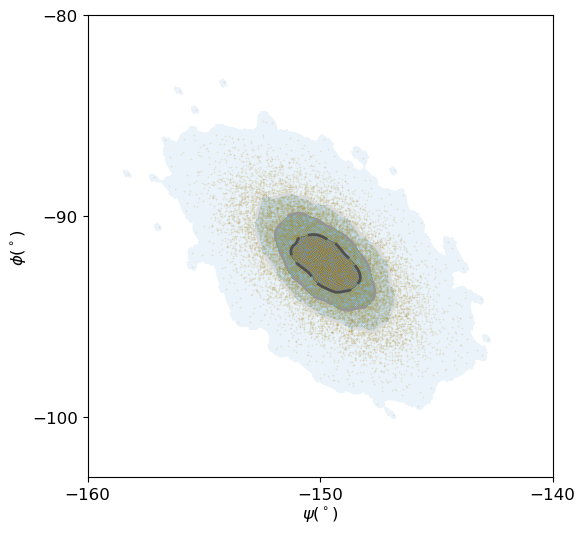

In [66]:
dict = {'Phi' : cent_layer[0], 'Psi' : cent_layer[1]}
df = pd.DataFrame(data = dict)


fig, ax = plt.subplots(figsize=(6, 6))

levels=5
alpha=0.6
cut=3
thresh=0.001
gridsize=200
bw_adjust=0.8
bw_method="silverman"
linewidths=2
contour_alpha = 1
data_point_edge_colour = "#3c3c3c"
data_point_colour = "#D4AB2D"

sns.kdeplot(
    data=df,
    y="Phi", x="Psi",
    levels=levels,
    fill=True,
    alpha=alpha,
    cut=cut,
    ax=ax,
    thresh=thresh,
    gridsize=gridsize,
    bw_adjust=bw_adjust,
    bw_method=bw_method,
    cmap="Blues",

)

sns.kdeplot(
    data=df,
    y="Phi", x="Psi",
    levels=levels,
    fill=False,
    alpha=contour_alpha,
    cut=cut,
    ax=ax,
    thresh=thresh,
    gridsize=gridsize,
    bw_adjust=bw_adjust,
    bw_method=bw_method,
    zorder=2 , 
    cmap="Greys",
    linestyles="--",
    shade=False,
    shade_lowest=False,
    linewidths = linewidths 

)
sns.scatterplot(
    data=df,
    y="Phi", x="Psi",
    color=data_point_colour,
    s=1,
    linewidth=0.1,
    edgecolor=data_point_edge_colour,
    ax=ax,
    zorder=1,
    alpha=0.2
)

fontsize = 12
ax.set_ylabel(r'$\phi (^\circ)$' , fontsize = fontsize, labelpad=2)
ax.set_xlabel(r'$\psi (^\circ)$' , fontsize = fontsize, labelpad=2)

x_lim = [-160,-140]
y_lim = [-103.00, -80.00]
ax.set_ylim(y_lim[0],y_lim[1])
ax.set_xlim(x_lim[0],x_lim[1])
ax.set_xticks(np.arange(x_lim[0],x_lim[1]+1,10))
ax.set_yticks(np.arange(y_lim[0]+3,y_lim[1]+1,10))
ax.tick_params(axis='both', which='major', labelsize=fontsize)

In [3]:
dict = {'Phi_orig' : orig_layer[0], 'Psi_orig' : orig_layer[1], 'Phi_cen' : cent_layer[0], 'Psi_cen' : cent_layer[1]}
df = pd.DataFrame(data = dict)
levels=5
alpha=0.6
cut=3
thresh=0.001
gridsize=200
bw_adjust=0.8
bw_method="silverman"
linewidths=0.3
contour_alpha = 1
data_point_edge_colour = "#3c3c3c"
data_point_colour = "#D4AB2D"
cmap_fill = 'PuBu'
cmap_cont = "Reds"

/Users/arashelahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arashelahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arashelahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arashelahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

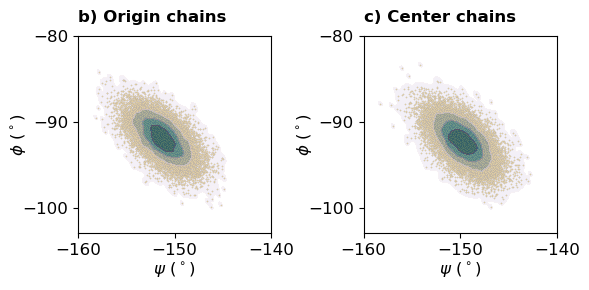

In [5]:
fig, axs = plt.subplots(1, 2,figsize=(6.0,3.0))
group_vec = ['orig' , 'cen']
title_vec = ['b) Origin chains' , 'c) Center chains']




# fig, ax = plt.subplots(figsize=(6, 6))
for group_iter , group in enumerate(group_vec):

    sns.scatterplot(
        data=df,
        y="Phi_%s" %  group, x="Psi_%s" %  group,
        color=data_point_colour,
        s=1,
        linewidth=0.1,
        edgecolor=data_point_edge_colour,
        ax=axs[group_iter],
        # zorder=2,
        alpha=1
    )
     
    sns.kdeplot(
        data=df,
        y="Phi_%s" %  group, x="Psi_%s" %  group,
        levels=levels,
        fill=True,
        alpha=alpha,
        cut=cut,
        ax=axs[group_iter],
        thresh=thresh,
        gridsize=gridsize,
        bw_adjust=bw_adjust,
        bw_method=bw_method,
        cmap=cmap_fill
    )
    
    sns.kdeplot(
        data=df,
        y="Phi_%s" %  group, x="Psi_%s" %  group,
        levels=levels,
        fill=False,
        alpha=contour_alpha,
        cut=cut,
        ax=axs[group_iter],
        thresh=thresh,
        gridsize=gridsize,
        bw_adjust=bw_adjust,
        bw_method=bw_method,
        zorder=2 , 
        cmap= cmap_cont , 
        linestyles="--",
        # shade=False,
        # shade_lowest=False,
        linewidths = linewidths 
    )


    fontsize = 12
    axs[group_iter].set_ylabel(r'$\phi$ ($^\circ)$' , fontsize = fontsize, labelpad=-5)
    axs[group_iter].set_xlabel(r'$\psi$ ($^\circ)$' , fontsize = fontsize, labelpad=2)
    
    x_lim = [-160,-140]
    y_lim = [-103.00, -80.00]
    axs[group_iter].set_ylim(y_lim[0],y_lim[1])
    axs[group_iter].set_xlim(x_lim[0],x_lim[1])
    axs[group_iter].set_xticks(np.arange(x_lim[0],x_lim[1]+1,10))
    axs[group_iter].set_yticks(np.arange(y_lim[0]+3,y_lim[1]+1,10))
    axs[group_iter].tick_params(axis='both', which='major', labelsize=fontsize)
    axs[group_iter].set_title(title_vec[group_iter], fontsize=fontsize,loc='left',fontweight='bold' , pad = 10)

plt.tight_layout(w_pad = 0.1)
fig.savefig("phi_psi_seaborn.png", dpi=1200 ,bbox_inches='tight')#, transparent=True)